In [106]:
# using Pkg
# Pkg.activate("..")
# Pkg.instantiate()
# Pkg.update()

In [107]:
using Cropbox
using Test
# using Plots
using TimeZones
using DataFramesMeta
using CSV

# Cropbox.Interact.WebIO.setup(:ijulia)

In [108]:
include("../src/Garttuce.jl")

using Dates

┌ Warning: duplicate variable
│   system = Mass
│   name = living_total_mass
│   alias = nothing => nothing
│   state = :Track => :Track
└ @ Cropbox /Users/cariso27001/.julia/packages/Cropbox/aE8bI/src/macro.jl:690


In [109]:
Lettuce = @config (
# # CV PHYL ILN GLN LL LER SG SD LTAR LTARa LIR Topt Tceil critPPD
# KM1 134 4 10 65.0 4.70 1.84 122 0 0.4421 0.1003 22.28 34.23 12 0.780714, 0.542167
    :Phenology => (
        emergence_optimal_temperature = 15.0,
        # emergence_ceiling_temperature = 28.0,
        emergence_ceiling_temperature = 30.0,
        # optimal_temperature = 15, # Topt 2nd
        optimal_temperature = 30,
        # ceiling_temperature = 28, # Tceil
        # ceiling_temperature = 35, # Tceil 2nd
        ceiling_temperature = 40,
        critical_photoperiod = 24, # critPPD
        # maximum_leaf_initiation_rate = 0.943214, 1st
        # maximum_leaf_initiation_rate = 1.28438, 2nd
        maximum_leaf_initiation_rate = 0.8,
        # maximum_leaf_initiation_rate = 0.979699,
        # maximum_emergence_rate = 0.02,
        # maximum_phyllochron_asymptote = 0.802838, 1st
        # maximum_phyllochron_asymptote = 0.56799, 2nd
        maximum_phyllochron_asymptote = 0.7,
        # maximum_phyllochron_asymptote = 0.603197,
        leaves_generic = 100, # GLN 2nd
        # leaves_generic = 10, # GLN
        # leaves_generic = 30, # GLN 1st
    ),
    :Leaf => (
        # maximum_elongation_rate = 4.7,
        maximum_elongation_rate = 4.7,
        minimum_length_of_longest_leaf = 20, # LL 2nd
        # minimum_length_of_longest_leaf = 15.0, # LL 1st
        stay_green = 3,
        # length_to_width_ratio = 0.8, # 1st
        length_to_width_ratio = 0.3 # 2nd
    ),
    :Carbon => (
# # Rm Yg
# 0.012 0.8
        #maintenance_respiration_coefficient = 0.012, # Rm
        maintenance_respiration_coefficient = 0.039, # Rm (Carbon use efficiency depends on growth respiration, maintenance respiration, and relative growth rate. A case study with lettuce)
        #synthesis_efficiency = 0.8, # Yg
        synthesis_efficiency = 0.7, # Yg
        partitioning_table = [
        # root leaf stem
          0.00 0.00 0.00 ; # seed garlic before germination
          0.15 0.60 0.25 ; # vegetative stage
          0.00 0.00 0.00 ; # dead
        ],
    ),
    :Mass => (
        initial_seed_mass = 0.001,
    ),
);

In [110]:
ConstructHi = @config(Lettuce, (
    :Phenology => (
        planting_date = ZonedDateTime(2022, 9, 6, tz"Asia/Taipei"),
        emergence_date = ZonedDateTime(2022, 9, 14, tz"Asia/Taipei"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2022,
    ),
    :Calendar => (
        init = ZonedDateTime(2022, 9, 6, 17, tz"Asia/Taipei"),
        last = ZonedDateTime(2022, 10, 31, tz"Asia/Taipei"),
    ),
    :Weather => (
        CO2 = 390,
        store = Garttuce.loadwea("$(@__DIR__)/../data/WEA_Autumn2022/autumn2022_Hi.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
));

In [111]:
ConstructMi = @config(Lettuce, (
    :Phenology => (
        planting_date = ZonedDateTime(2022, 9, 6, tz"Asia/Taipei"),
        emergence_date = ZonedDateTime(2022, 9, 14, tz"Asia/Taipei"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2022,
    ),
    :Calendar => (
        init = ZonedDateTime(2022, 9, 6, 17, tz"Asia/Taipei"),
        last = ZonedDateTime(2022, 10, 31, tz"Asia/Taipei"),
    ),
    :Weather => (
        CO2 = 390,
        store = Garttuce.loadwea("$(@__DIR__)/../data/WEA_Autumn2022/autumn2022_Mi.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
));

In [112]:
ConstructLo = @config(Lettuce, (
    :Phenology => (
        planting_date = ZonedDateTime(2022, 9, 6, tz"Asia/Taipei"),
        emergence_date = ZonedDateTime(2022, 9, 14, tz"Asia/Taipei"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2022,
    ),
    :Calendar => (
        init = ZonedDateTime(2022, 9, 6, 17, tz"Asia/Taipei"),
        last = ZonedDateTime(2022, 10, 31, tz"Asia/Taipei"),
    ),
    :Weather => (
        CO2 = 390,
        store = Garttuce.loadwea("$(@__DIR__)/../data/WEA_Autumn2022/autumn2022_Lo.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
));

Progress: 100%[===========================] Time: 0:00:02 ( 2.04 ms/it)


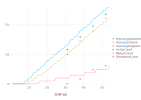

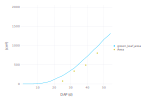

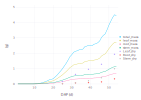

In [113]:
obs_drymass = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_DryMass_Hi.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafArea_Hi.csv", DataFrame) |> unitfy
obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafNum_Hi.csv", DataFrame) |> unitfy

r = simulate(Garttuce.Model;
    config=ConstructHi,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:Initial_leaf, :Mature_leaf, :Senesced_leaf]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:Area]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:total_mass, :leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:Leaf_dry, :Root_dry, :Stem_dry]) |> display # Fig. Biomass
#visualize(r, :DAP, [:A_net], kind=:line) |> display

In [114]:
DataFrame(Vars = ["Appeared Leaves", "Matured Leaves", "Senesced Leaves"],
EF = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:ef)],
RMSE = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:rmse)
]) |> display

DataFrame(Vars = ["Green Leaf Area"],
EF = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:ef)],
RMSE = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:rmse)
]) |> display

DataFrame(Vars = ["Leaf Mass", "Stem Mass", "Root Mass"],
EF = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:ef)],
RMSE = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:rmse)
]) |> display

Row,Vars,EF,RMSE
,String,Float64,Float64
1,Appeared Leaves,0.824842,1.88333
2,Matured Leaves,0.973786,0.671234
3,Senesced Leaves,-0.503333,1.37083


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Green Leaf Area,0.715182,151.972 cm²


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Leaf Mass,0.237349,0.602598 g
2,Stem Mass,-0.420636,0.342685 g
3,Root Mass,-1.56896,0.276493 g


In [115]:
CSV.write("$(@__DIR__)/../output/SimExportA-3-Hi(AfterCal).csv", r)

"/Users/cariso27001/CropModeling/Garttuce/test/../output/SimExportA-3-Hi(AfterCal).csv"

Progress: 100%[===========================] Time: 0:00:01 ( 1.22 ms/it)


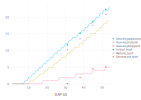

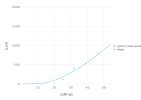

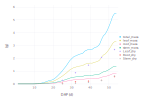

In [116]:
obs_drymass = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_DryMass_Mi.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafArea_Mi.csv", DataFrame) |> unitfy
obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafNum_Mi.csv", DataFrame) |> unitfy

r = simulate(Garttuce.Model;
    config=ConstructMi,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:Initial_leaf, :Mature_leaf, :Senesced_leaf]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:Area]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:total_mass, :leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:Leaf_dry, :Root_dry, :Stem_dry]) |> display # Fig. Biomass
#visualize(r, :DAP, [:A_net], kind=:line) |> display

In [117]:
DataFrame(Vars = ["Appeared Leaves", "Matured Leaves", "Senesced Leaves"],
EF = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:ef)],
RMSE = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:rmse)
]) |> display

DataFrame(Vars = ["Green Leaf Area"],
EF = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:ef)],
RMSE = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:rmse)
]) |> display

DataFrame(Vars = ["Leaf Mass", "Stem Mass", "Root Mass"],
EF = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:ef)],
RMSE = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:rmse)
]) |> display

Row,Vars,EF,RMSE
,String,Float64,Float64
1,Appeared Leaves,0.992471,0.330404
2,Matured Leaves,0.59558,2.13301
3,Senesced Leaves,-0.0244444,1.13162


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Green Leaf Area,0.949808,47.873 cm²


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Leaf Mass,0.822984,0.375454 g
2,Stem Mass,-1.23764,0.556205 g
3,Root Mass,0.219383,0.197111 g


In [118]:
CSV.write("$(@__DIR__)/../output/SimExportA-3-Mi(AfterCal).csv", r)

"/Users/cariso27001/CropModeling/Garttuce/test/../output/SimExportA-3-Mi(AfterCal).csv"

Progress: 100%[===========================] Time: 0:00:01 ( 1.20 ms/it)


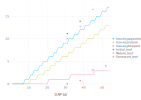

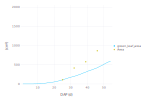

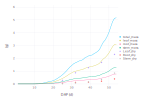

In [119]:
obs_drymass = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_DryMass_Lo.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafArea_Lo.csv", DataFrame) |> unitfy
obs_leafnum = CSV.read("$(@__DIR__)/../data/OBS_Autumn2022/autumn2022_LeafNum_Lo.csv", DataFrame) |> unitfy

r = simulate(Garttuce.Model;
    config=ConstructLo,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:Initial_leaf, :Mature_leaf, :Senesced_leaf]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:Area]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:total_mass, :leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:Leaf_dry, :Root_dry, :Stem_dry]) |> display # Fig. Biomass
#visualize(r, :DAP, [:A_net], kind=:line) |> display


In [120]:
DataFrame(Vars = ["Appeared Leaves", "Matured Leaves", "Senesced Leaves"],
EF = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:ef),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:ef)],
RMSE = [
evaluate(obs_leafnum, r; index = :DAP, target = :Initial_leaf => :leaves_appeared, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Mature_leaf => :leaves_mature, metric=:rmse),
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_leaf => :leaves_dropped, metric=:rmse)
]) |> display

DataFrame(Vars = ["Green Leaf Area"],
EF = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:ef)],
RMSE = [
evaluate(obs_area, r; index = :DAP, target = :Area => :green_leaf_area, metric=:rmse)
]) |> display

DataFrame(Vars = ["Leaf Mass", "Stem Mass", "Root Mass"],
EF = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:ef)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:ef)],
RMSE = [
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Stem_dry => :stem_mass, metric=:rmse)
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:rmse)
]) |> display

Row,Vars,EF,RMSE
,String,Float64,Float64
1,Appeared Leaves,-0.777944,3.44819
2,Matured Leaves,-3.93516,5.7449
3,Senesced Leaves,-1.33278,1.07999


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Green Leaf Area,-4.62915,280.173 cm²


Row,Vars,EF,RMSE
,String,Float64,Quantity…
1,Leaf Mass,0.837862,0.361138 g
2,Stem Mass,0.0795054,0.358534 g
3,Root Mass,-0.0178802,0.226214 g


In [121]:
CSV.write("$(@__DIR__)/../output/SimExportA-3-Lo(AfterCal).csv", r)

"/Users/cariso27001/CropModeling/Garttuce/test/../output/SimExportA-3-Lo(AfterCal).csv"